<a href="https://colab.research.google.com/github/Jayameena832/Is-the-road-safe-Project/blob/main/task_4(is_the_road_safe).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import keras
import pandas as pd

In [4]:
fashion_mnist=keras.datasets.fashion_mnist

In [5]:
(X_train,Y_train),(X_test,Y_test)=fashion_mnist.load_data()

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train[5].shape

(28, 28)

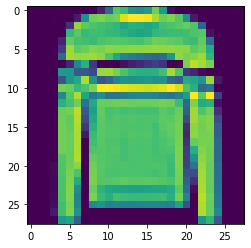

In [8]:
import matplotlib.pyplot as plt
image = plt.imshow(X_train[5])
image

In [9]:
import cv2
backtorgb = cv2.cvtColor(X_train[5],cv2.COLOR_GRAY2RGB)

In [10]:
backtorgb

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

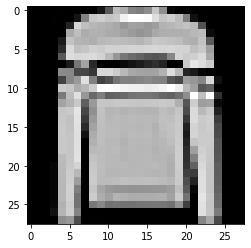

In [11]:
plt.imshow(backtorgb)

In [12]:
import numpy as np

In [13]:
def resize_image_array(img, img_size_dims):
    img = cv2.resize(img, dsize=img_size_dims, 
                     interpolation=cv2.INTER_CUBIC)
    img = np.array(img, dtype=np.float32)
    return img

In [14]:
IMG_DIMS = (32, 32)
X_train = np.array([resize_image_array(img, img_size_dims=IMG_DIMS) for img in X_train])

In [15]:
img1 = np.zeros((len(X_train),32,32,3))
for i in range(X_train.shape[0]):
  img1[i]=cv2.cvtColor(X_train[i],cv2.COLOR_GRAY2RGB)

In [ ]:
#Y_train = tf.keras.utils.to_categorical(Y_train , num_classes=10)

In [16]:
Y_train.shape

(60000,)

In [17]:
img1[8].shape

(32, 32, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


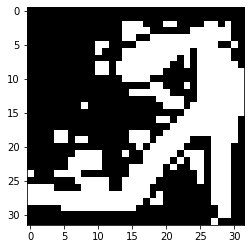

In [19]:
plt.imshow(img1[8])

In [21]:
from keras.models import Sequential

In [22]:
#only model building part
model=Sequential()
model_part1=tf.keras.applications.ResNet50(
    include_top=False, #deletes the outer layer
    weights="imagenet",
    input_tensor=None,
    input_shape=(32,32,3), #according to X_train however check instructions on the page before use
    pooling='avg', #not required but preferred
    classes=10,#according to yoour need
  
)
for layer in model_part1.layers:
    layer.trainable=False

94781440/94765736 [==============================] - 0s 0us/step


In [23]:
from keras.layers import Flatten,Dense

In [24]:
model.add(model_part1)

In [25]:
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [26]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 24,641,930
Trainable params: 1,054,218
Non-trainable params: 23,587,712
_________________________________________________________________


In [28]:
img1=img1/255.0

In [29]:
model.fit(img1,Y_train,epochs=2,validation_split=0.1)

Epoch 1/2
1688/1688 [==============================] - 285s 166ms/step - loss: 0.8935 - accuracy: 0.6645 - val_loss: 0.7388 - val_accuracy: 0.7218
Epoch 2/2
1688/1688 [==============================] - 275s 163ms/step - loss: 0.7108 - accuracy: 0.7314 - val_loss: 0.6829 - val_accuracy: 0.7285
